In [9]:
import os,sys,glob,torch
import time
import numpy as np
from lib.util import natural_key
import matplotlib.pyplot as plt
import open3d as o3d
from tqdm import tqdm
import seaborn as sns
from lib.util import transform_pcd,get_geometric_errors,get_angle_deviation,natural_key
from lib.benchmark import read_trajectory,write_trajectory,benchmark

In [12]:
len(files)

531

In [10]:
files=sorted(glob.glob('dump/pruning_results/*.pth'),key=natural_key)[:500]
for eachfile in files:
    data=torch.load(eachfile)
    

['dump/pruning_results/0.pth',
 'dump/pruning_results/1.pth',
 'dump/pruning_results/2.pth',
 'dump/pruning_results/3.pth',
 'dump/pruning_results/4.pth',
 'dump/pruning_results/5.pth',
 'dump/pruning_results/6.pth',
 'dump/pruning_results/7.pth',
 'dump/pruning_results/8.pth',
 'dump/pruning_results/9.pth',
 'dump/pruning_results/10.pth',
 'dump/pruning_results/11.pth',
 'dump/pruning_results/12.pth',
 'dump/pruning_results/13.pth',
 'dump/pruning_results/14.pth',
 'dump/pruning_results/15.pth',
 'dump/pruning_results/16.pth',
 'dump/pruning_results/17.pth',
 'dump/pruning_results/18.pth',
 'dump/pruning_results/19.pth',
 'dump/pruning_results/20.pth',
 'dump/pruning_results/21.pth',
 'dump/pruning_results/22.pth',
 'dump/pruning_results/23.pth',
 'dump/pruning_results/24.pth',
 'dump/pruning_results/25.pth',
 'dump/pruning_results/26.pth',
 'dump/pruning_results/27.pth',
 'dump/pruning_results/28.pth',
 'dump/pruning_results/29.pth',
 'dump/pruning_results/30.pth',
 'dump/pruning_res

In [3]:
results=torch.load('dump/thesis/oanet_prune_lowoverlap.pth')

In [7]:
idx=np.where(results['flag']==True)

(array([   4,    7,   10, ..., 6369, 6370, 6371]),)

In [4]:
data=np.load('dump/thesis/patch_recall.npy',allow_pickle=True)

[[tensor(0., device='cuda:0') tensor(3., device='cuda:0')
  tensor(4., device='cuda:0') ... tensor(9., device='cuda:0')
  tensor(9., device='cuda:0') tensor(10., device='cuda:0')]
 [tensor(2., device='cuda:0') tensor(2., device='cuda:0')
  tensor(4., device='cuda:0') ... tensor(8., device='cuda:0')
  tensor(8., device='cuda:0') tensor(8., device='cuda:0')]
 [tensor(0., device='cuda:0') tensor(1., device='cuda:0')
  tensor(3., device='cuda:0') ... tensor(10., device='cuda:0')
  tensor(10., device='cuda:0') tensor(10., device='cuda:0')]
 ...
 [tensor(3., device='cuda:0') tensor(4., device='cuda:0')
  tensor(5., device='cuda:0') ... tensor(10., device='cuda:0')
  tensor(10., device='cuda:0') tensor(11., device='cuda:0')]
 [tensor(3., device='cuda:0') tensor(6., device='cuda:0')
  tensor(9., device='cuda:0') ... tensor(12., device='cuda:0')
  tensor(12., device='cuda:0') tensor(12., device='cuda:0')]
 [tensor(0., device='cuda:0') tensor(2., device='cuda:0')
  tensor(2., device='cuda:0') ..

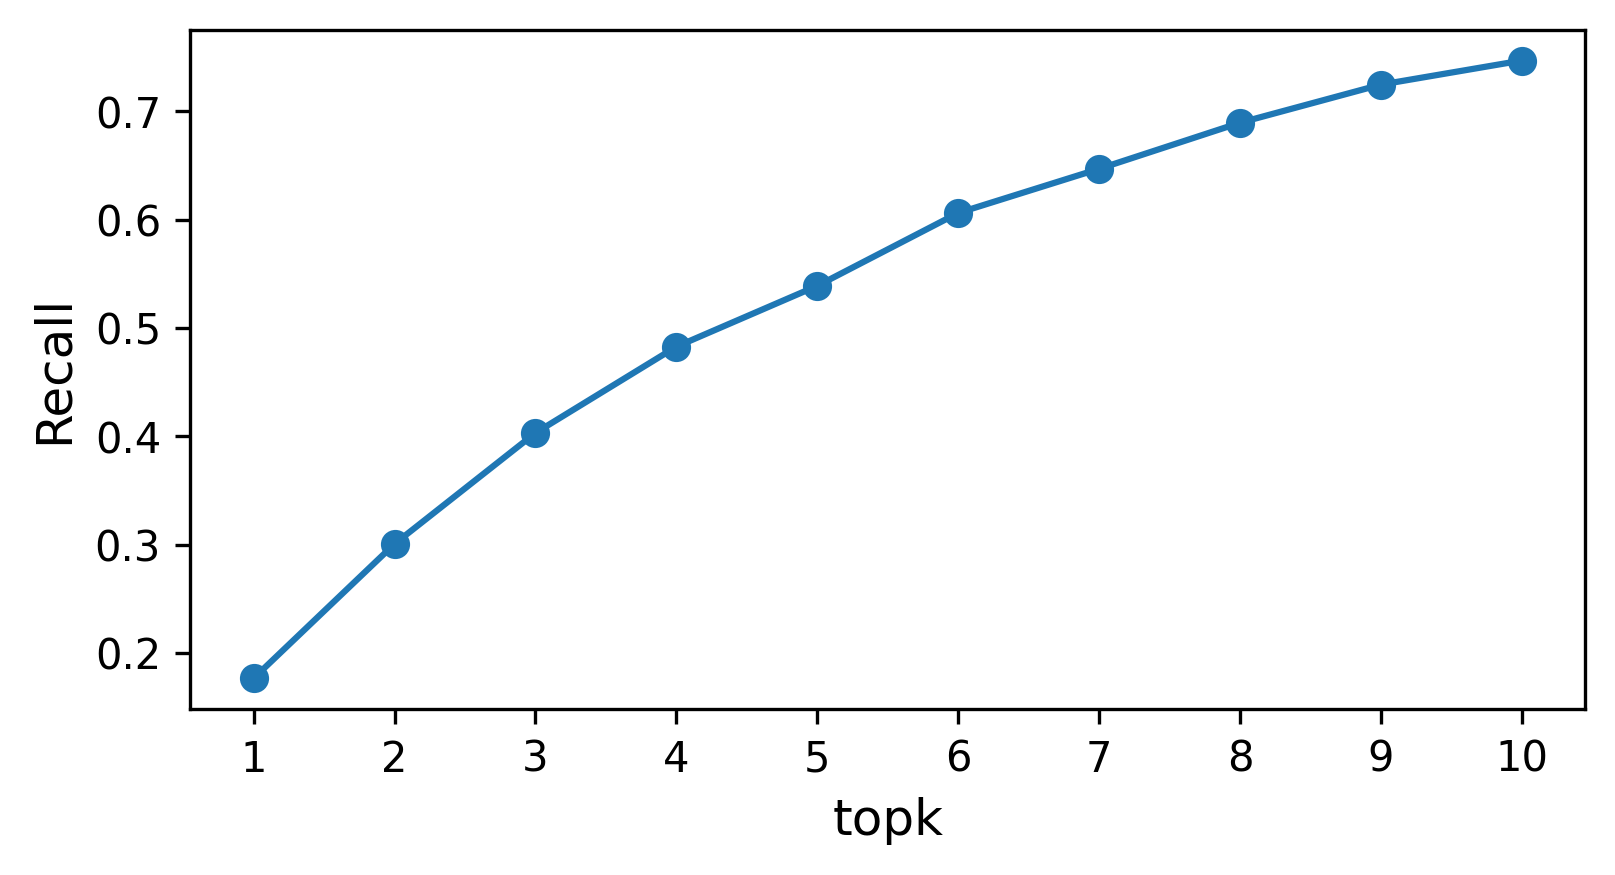

In [23]:
datas=[]
for i in range(len(data)-1):
    c_data=[ele.item() for ele in data[i]]
    datas.append(c_data)
datas=np.array(datas)[:,:10]
datas=datas.sum(0)/1620
plt.figure(figsize=(6,3),dpi=300)
plt.plot(np.arange(1,11,1),datas,'-o')
plt.xticks(np.arange(1,11,1))
plt.xlabel('topk',fontsize=12)
plt.ylabel('Recall',fontsize=12)
plt.savefig('../../assets/recall@k.pdf',bbox_inches='tight')

In [10]:
benchmark=np.load('../../dataset/3DMatch/fcgf_0.025_test_benchmark.npz')

In [11]:
len(benchmark['overlap'])

1623

In [26]:
data=torch.load('dump/thesis/oanet_prune_lowoverlap.pth')
rot_1=data['rot_gt']
data=torch.load('dump/thesis/oanet_lowoverlap.pth')
rot_2=data['rot_gt']

In [27]:
len(rot_1)

6372

In [28]:
len(rot_2)

6360

In [22]:
np.allclose(rot_1[:1608],rot_2)

True

In [3]:
files=glob.glob('dump/check_perm_2/*.pth')
for i in range(10):
    idx=np.random.randint(0,len(files),1)[0]
    data=torch.load(files[idx])
    est=data['est'].exp()[0]
    est[-1,-1]=0
    gt=data['gt'][0]
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.heatmap(gt)
    plt.subplot(1,2,2)
    sns.heatmap(est)

ValueError: low >= high

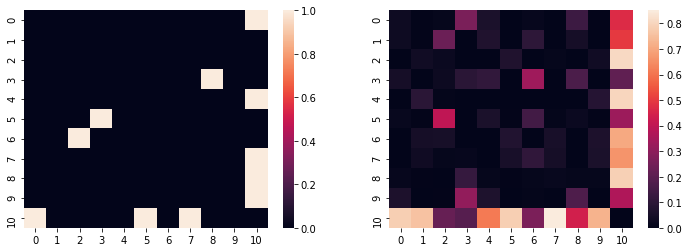

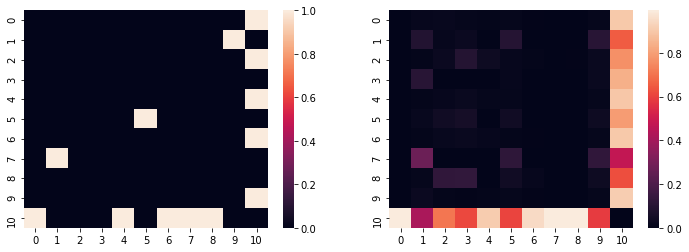

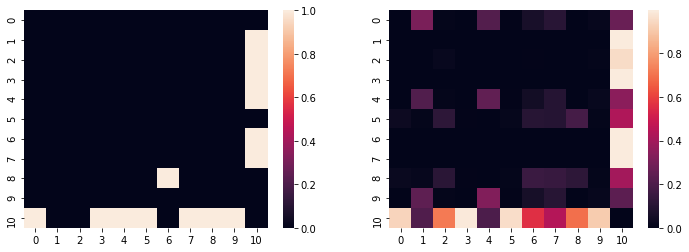

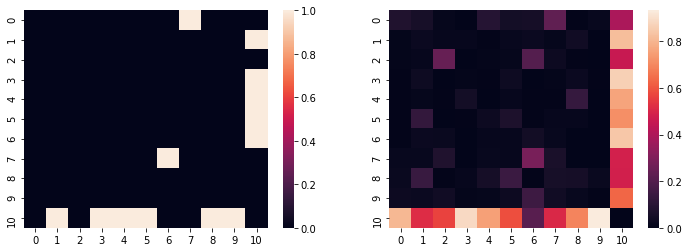

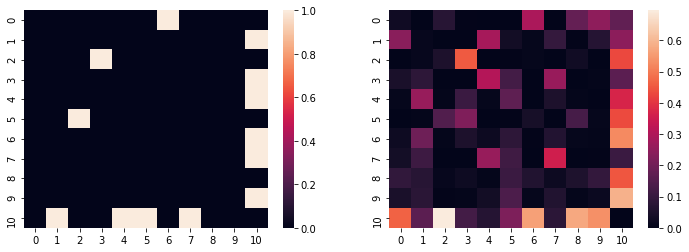

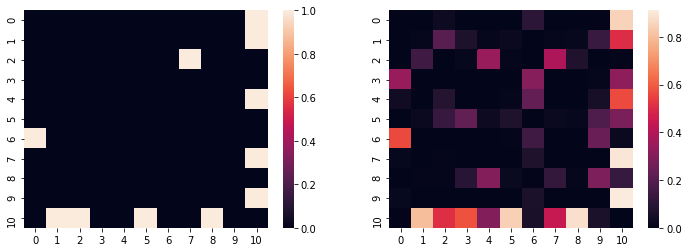

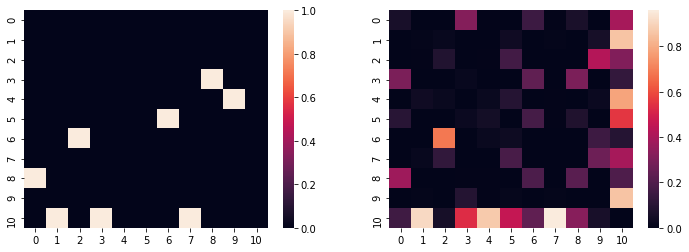

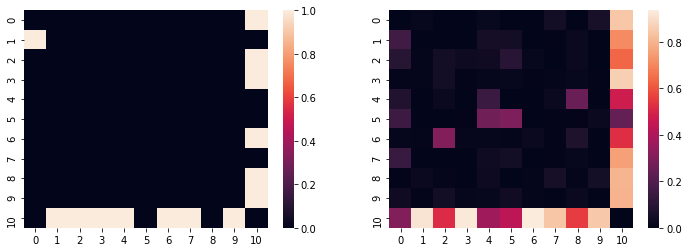

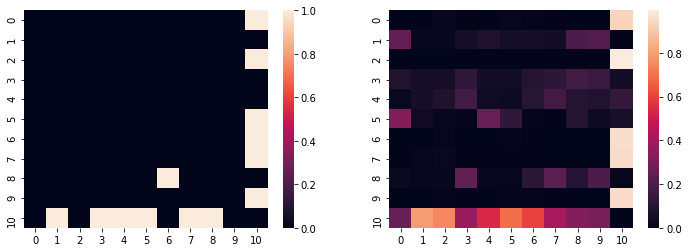

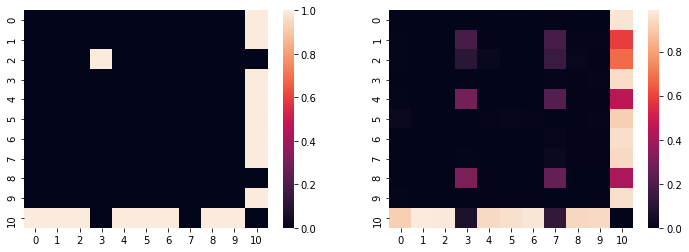

In [3]:
files=glob.glob('dump/check_perm_1/*.pth')
for i in range(10):
    idx=np.random.randint(0,len(files),1)[0]
    data=torch.load(files[idx])
    est=data['est'].exp()[0]
    est[-1,-1]=0
    gt=data['gt'][0]
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.heatmap(gt)
    plt.subplot(1,2,2)
    sns.heatmap(est)

In [5]:
data=np.load('prune_ana.npz')
before=data['before']
after=data['after']
x = np.sort(before)
y = np.arange(len(x))/float(len(x))
plt.plot(x, y)

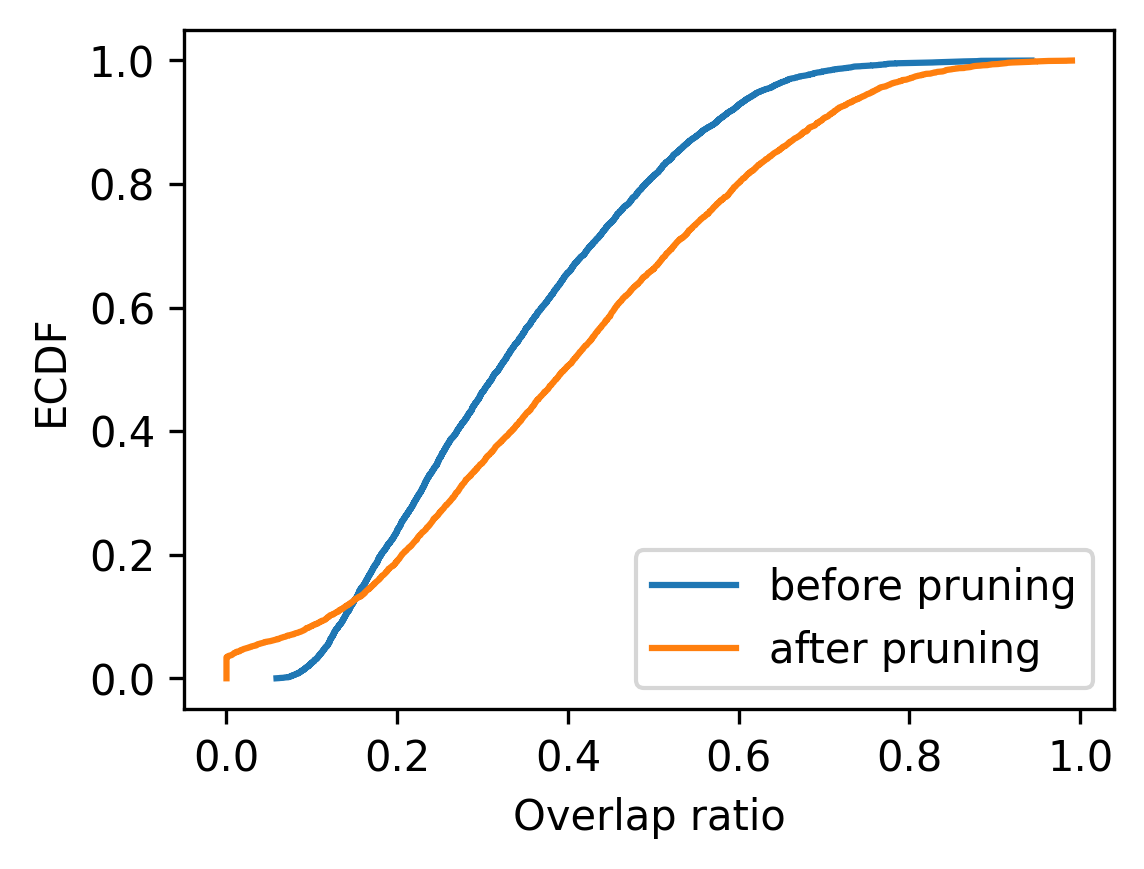

In [10]:
data=np.load('prune_ana.npz')
before=data['before']
after=data['after']
plt.figure(figsize=(4,3),dpi=300)
x = np.sort(before)
y = np.arange(len(x))/float(len(x))
plt.plot(x, y,label='before pruning')
x = np.sort(after)
y = np.arange(len(x))/float(len(x))
plt.plot(x, y,label='after pruning')
plt.xlabel('Overlap ratio')
plt.ylabel('ECDF')
plt.legend()

(array([1122., 1649., 1606., 1170.,  555.,  186.,   53.,   20.,    7.,
           4.]),
 array([0.        , 0.17758406, 0.35516812, 0.53275218, 0.71033624,
        0.8879203 , 1.06550436, 1.24308842, 1.42067248, 1.59825654,
        1.7758406 ]),
 <a list of 10 Patch objects>)

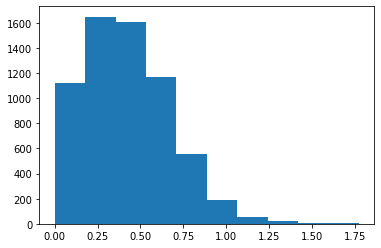

In [31]:
data=np.load('prune_ana.npz')
before=data['before']
after=data['after']
plt.hist(after)

## OANet+pruning

In [18]:
data=torch.load('oanet.pth')
rot,trans=data['rot'],data['trans']
info=np.load('../../dataset/3DMatch/fcgf_0.025_test_benchmark.npz')


tsfm_est=[]
for i in range(rot.shape[0]):
    tsfm=np.eye(4)
    tsfm[:3,:3]=rot[i]
    tsfm[:3,3]=trans[i]
    tsfm_est.append(tsfm)
tsfm_est=np.array(tsfm_est)

benchmark_dir='../../benchmark/3DMatch/gt_result'
scene_names=sorted(os.listdir(benchmark_dir))
c_stamp=time.strftime("%d_%H:%M:%S",time.localtime())
exp_dir=os.path.join(benchmark_dir.split('/gt_result')[0],c_stamp)
os.makedirs(exp_dir)
pcds,colors=[],[]
count=0
for scene_name in scene_names:
    gt_pairs, gt_traj = read_trajectory(os.path.join(benchmark_dir,scene_name,'gt.log'))
    n_samples=len(gt_pairs)
    
    # write the trajectory
    c_directory=os.path.join(exp_dir,scene_name)
    os.makedirs(c_directory)
    write_trajectory(tsfm_est[count:count+n_samples],gt_pairs,os.path.join(c_directory,'est.log'))
    count+=n_samples
benchmark(exp_dir)

Scene	¦ prec.	¦ rec.	¦ re	¦ te	¦ samples	¦
Kitchen	¦ 0.960	¦ 0.960	¦ 2.111	¦ 0.060	¦ 449¦
Home 1	¦ 0.906	¦ 0.906	¦ 1.966	¦ 0.062	¦ 106¦
Home 2	¦ 0.698	¦ 0.698	¦ 3.390	¦ 0.125	¦ 159¦
Hotel 1	¦ 0.956	¦ 0.956	¦ 1.915	¦ 0.066	¦ 182¦
Hotel 2	¦ 0.885	¦ 0.885	¦ 2.125	¦ 0.069	¦  78¦
Hotel 3	¦ 0.808	¦ 0.808	¦ 1.720	¦ 0.044	¦  26¦
Study	¦ 0.833	¦ 0.833	¦ 2.418	¦ 0.096	¦ 234¦
MIT Lab	¦ 0.689	¦ 0.689	¦ 2.852	¦ 0.138	¦  45¦
Mean precision 0.842 +- 0.099
Mean recall 0.842 +- 0.099


## LTFGC+Pruning

In [15]:
data=torch.load('ltfgc.pth')
rot,trans=data['rot'],data['trans']
info=np.load('../../dataset/3DMatch/fcgf_0.025_test_benchmark.npz')


tsfm_est=[]
for i in range(rot.shape[0]):
    tsfm=np.eye(4)
    tsfm[:3,:3]=rot[i]
    tsfm[:3,3]=trans[i]
    tsfm_est.append(tsfm)
tsfm_est=np.array(tsfm_est)

benchmark_dir='../../benchmark/3DMatch/gt_result'
scene_names=sorted(os.listdir(benchmark_dir))
c_stamp=time.strftime("%d_%H:%M:%S",time.localtime())
exp_dir=os.path.join(benchmark_dir.split('/gt_result')[0],c_stamp)
os.makedirs(exp_dir)
pcds,colors=[],[]
count=0
for scene_name in scene_names:
    gt_pairs, gt_traj = read_trajectory(os.path.join(benchmark_dir,scene_name,'gt.log'))
    n_samples=len(gt_pairs)
    
    # write the trajectory
    c_directory=os.path.join(exp_dir,scene_name)
    os.makedirs(c_directory)
    write_trajectory(tsfm_est[count:count+n_samples],gt_pairs,os.path.join(c_directory,'est.log'))
    count+=n_samples
benchmark(exp_dir)

Scene	¦ prec.	¦ rec.	¦ re	¦ te	¦ samples	¦
Kitchen	¦ 0.949	¦ 0.949	¦ 2.306	¦ 0.064	¦ 449¦
Home 1	¦ 0.906	¦ 0.906	¦ 2.033	¦ 0.072	¦ 106¦
Home 2	¦ 0.742	¦ 0.742	¦ 3.210	¦ 0.122	¦ 159¦
Hotel 1	¦ 0.929	¦ 0.929	¦ 2.064	¦ 0.071	¦ 182¦
Hotel 2	¦ 0.923	¦ 0.923	¦ 2.093	¦ 0.074	¦  78¦
Hotel 3	¦ 0.846	¦ 0.846	¦ 1.984	¦ 0.055	¦  26¦
Study	¦ 0.795	¦ 0.795	¦ 2.832	¦ 0.100	¦ 234¦
MIT Lab	¦ 0.644	¦ 0.644	¦ 2.679	¦ 0.123	¦  45¦
Mean precision 0.842 +- 0.100
Mean recall 0.842 +- 0.100


## TEASER++

In [15]:
benchmark('teaser_2000')

Scene	¦ prec.	¦ rec.	¦ re	¦ te	¦ samples	¦
Kitchen	¦ 0.967	¦ 0.967	¦ 1.649	¦ 0.041	¦ 449¦
Home 1	¦ 0.962	¦ 0.962	¦ 1.501	¦ 0.048	¦ 106¦
Home 2	¦ 0.792	¦ 0.792	¦ 2.263	¦ 0.068	¦ 159¦
Hotel 1	¦ 0.940	¦ 0.940	¦ 1.534	¦ 0.053	¦ 182¦
Hotel 2	¦ 0.897	¦ 0.897	¦ 1.614	¦ 0.054	¦  78¦
Hotel 3	¦ 0.846	¦ 0.846	¦ 1.631	¦ 0.047	¦  26¦
Study	¦ 0.850	¦ 0.850	¦ 2.129	¦ 0.086	¦ 234¦
MIT Lab	¦ 0.733	¦ 0.733	¦ 1.738	¦ 0.070	¦  45¦
Mean precision 0.874 +- 0.078
Mean recall 0.874 +- 0.078


In [14]:
benchmark('teaser_5000_mutual')

Scene	¦ prec.	¦ rec.	¦ re	¦ te	¦ samples	¦
Kitchen	¦ 0.962	¦ 0.962	¦ 1.676	¦ 0.042	¦ 449¦
Home 1	¦ 0.925	¦ 0.925	¦ 1.484	¦ 0.048	¦ 106¦
Home 2	¦ 0.736	¦ 0.736	¦ 2.214	¦ 0.067	¦ 159¦
Hotel 1	¦ 0.940	¦ 0.940	¦ 1.597	¦ 0.051	¦ 182¦
Hotel 2	¦ 0.859	¦ 0.859	¦ 1.568	¦ 0.054	¦  78¦
Hotel 3	¦ 0.808	¦ 0.808	¦ 1.561	¦ 0.038	¦  26¦
Study	¦ 0.855	¦ 0.855	¦ 1.975	¦ 0.076	¦ 234¦
MIT Lab	¦ 0.711	¦ 0.711	¦ 1.677	¦ 0.067	¦  45¦
Mean precision 0.849 +- 0.087
Mean recall 0.849 +- 0.087


### mutual+prune

In [8]:
for i in range(0,4):
    path=f'/scratch/shengyu/masterthesis/dataset/3DMatch/test/overlap_{i}.npz'
    data=np.load(path)
    rot,trans=data['rot'],data['trans'].squeeze()
    pose_est=np.load(f'dump/teaser_mutual_prune/overlap_{i}_est.npy')
    rot_est=pose_est[:,:3,:3]
    trans_est=pose_est[:,:3,3]
    
    rotation_error=get_angle_deviation(rot_est,rot)
    
    trans_error=np.linalg.norm(trans-trans_est,axis=-1)
    
    flag1=rotation_error<10
    flag2=trans_error<0.3
    
    flag=flag1 & flag2
    
    print(flag.sum()/len(flag))

0.278441231929604
0.6125269978401728
0.8124576844955992
0.8918099089989889


### mutual 

In [10]:
for i in range(0,4):
    path=f'/scratch/shengyu/masterthesis/dataset/3DMatch/test/overlap_{i}.npz'
    data=np.load(path)
    rot,trans=data['rot'],data['trans'].squeeze()
    pose_est=np.load(f'dump/teaser_mutual/overlap_{i}_est.npy')
    rot_est=pose_est[:,:3,:3]
    trans_est=pose_est[:,:3,3]
    
    rotation_error=get_angle_deviation(rot_est,rot)
    
    trans_error=np.linalg.norm(trans-trans_est,axis=-1)
    
    flag1=rotation_error<10
    flag2=trans_error<0.3
    
    flag=flag1 & flag2
    
    print(flag.sum()/len(flag))

0.31489629164047767
0.6617710583153348
0.8659444820582262
0.9302325581395349


In [16]:
for i in range(0,4):
    path=f'/scratch/shengyu/masterthesis/dataset/3DMatch/test/overlap_{i}.npz'
    data=np.load(path)
    rot,trans=data['rot'],data['trans'].squeeze()
    pose_est=np.load(f'dump/teaser/overlap_{i}_est.npy')
    rot_est=pose_est[:,:3,:3]
    trans_est=pose_est[:,:3,3]
    
    rotation_error=get_angle_deviation(rot_est,rot)
    
    trans_error=np.linalg.norm(trans-trans_est,axis=-1)
    
    flag1=rotation_error<10
    flag2=trans_error<0.3
    
    flag=flag1 & flag2
    
    print(flag.sum()/len(flag))

0.3060967944688875
0.67170626349892
0.8713608666215301
0.942366026289181


## RANSAC

### without mutual

In [3]:
benchmark('ransac_5000')

Scene	¦ prec.	¦ rec.	¦ re	¦ te	¦ samples	¦
Kitchen	¦ 0.878	¦ 0.878	¦ 2.229	¦ 0.065	¦ 449¦
Home 1	¦ 0.868	¦ 0.868	¦ 2.072	¦ 0.067	¦ 106¦
Home 2	¦ 0.623	¦ 0.623	¦ 3.206	¦ 0.096	¦ 159¦
Hotel 1	¦ 0.863	¦ 0.863	¦ 2.428	¦ 0.077	¦ 182¦
Hotel 2	¦ 0.872	¦ 0.872	¦ 2.547	¦ 0.090	¦  78¦
Hotel 3	¦ 0.808	¦ 0.808	¦ 2.184	¦ 0.068	¦  26¦
Study	¦ 0.752	¦ 0.752	¦ 3.249	¦ 0.119	¦ 234¦
MIT Lab	¦ 0.667	¦ 0.667	¦ 2.662	¦ 0.093	¦  45¦
Mean precision 0.791 +- 0.094
Mean recall 0.791 +- 0.094


In [4]:
benchmark('ransac_5000_mutual')

Scene	¦ prec.	¦ rec.	¦ re	¦ te	¦ samples	¦
Kitchen	¦ 0.953	¦ 0.953	¦ 1.972	¦ 0.047	¦ 449¦
Home 1	¦ 0.934	¦ 0.934	¦ 1.861	¦ 0.054	¦ 106¦
Home 2	¦ 0.742	¦ 0.742	¦ 2.428	¦ 0.076	¦ 159¦
Hotel 1	¦ 0.962	¦ 0.962	¦ 1.759	¦ 0.056	¦ 182¦
Hotel 2	¦ 0.872	¦ 0.872	¦ 1.891	¦ 0.070	¦  78¦
Hotel 3	¦ 0.808	¦ 0.808	¦ 1.765	¦ 0.042	¦  26¦
Study	¦ 0.889	¦ 0.889	¦ 2.361	¦ 0.086	¦ 234¦
MIT Lab	¦ 0.711	¦ 0.711	¦ 1.999	¦ 0.067	¦  45¦
Mean precision 0.859 +- 0.090
Mean recall 0.859 +- 0.090


In [7]:
for i in range(0,4):
    path=f'/scratch/shengyu/masterthesis/dataset/3DMatch/test/overlap_{i}.npz'
    data=np.load(path)
    rot,trans=data['rot'],data['trans'].squeeze()
    pose_est=np.load(f'dump/ransac/overlap_{i}_est.npy')
    rot_est=pose_est[:,:3,:3]
    trans_est=pose_est[:,:3,3]
    
    rotation_error=get_angle_deviation(rot_est,rot)
    
    trans_error=np.linalg.norm(trans-trans_est,axis=-1)
    
    flag1=rotation_error<10
    flag2=trans_error<0.3
    
    flag=flag1 & flag2
    
    print(flag.sum()/len(flag))

0.041483343808925204
0.3079913606911447
0.7061611374407583
0.9019211324570273


In [18]:
for i in range(0,4):
    path=f'/scratch/shengyu/masterthesis/dataset/3DMatch/test/overlap_{i}.npz'
    data=np.load(path)
    rot,trans=data['rot'],data['trans'].squeeze()
    pose_est=np.load(f'dump/ransac_prune/overlap_{i}_est.npy')
    rot_est=pose_est[:,:3,:3]
    trans_est=pose_est[:,:3,3]
    
    rotation_error=get_angle_deviation(rot_est,rot)
    
    trans_error=np.linalg.norm(trans-trans_est,axis=-1)
    
    flag1=rotation_error<10
    flag2=trans_error<0.3
    
    flag=flag1 & flag2
    
    print(flag.sum()/len(flag))

0.10119421747328725
0.41511879049676026
0.7467840216655383
0.8857431749241659


In [6]:
for i in range(0,4):
    path=f'/scratch/shengyu/masterthesis/dataset/3DMatch/test/overlap_{i}.npz'
    data=np.load(path)
    rot,trans=data['rot'],data['trans'].squeeze()
    pose_est=np.load(f'dump/ransac_mutual/overlap_{i}_est.npy')
    rot_est=pose_est[:,:3,:3]
    trans_est=pose_est[:,:3,3]
    
    rotation_error=get_angle_deviation(rot_est,rot)
    
    trans_error=np.linalg.norm(trans-trans_est,axis=-1)
    
    flag1=rotation_error<10
    flag2=trans_error<0.3
    
    flag=flag1 & flag2
    
    print(flag.sum()/len(flag))

0.2143306096794469
0.5822894168466523
0.8476641841570751
0.9302325581395349


In [19]:
for i in range(0,4):
    path=f'/scratch/shengyu/masterthesis/dataset/3DMatch/test/overlap_{i}.npz'
    data=np.load(path)
    rot,trans=data['rot'],data['trans'].squeeze()
    pose_est=np.load(f'dump/ransac_mutual_prune/overlap_{i}_est.npy')
    rot_est=pose_est[:,:3,:3]
    trans_est=pose_est[:,:3,3]
    
    rotation_error=get_angle_deviation(rot_est,rot)
    
    trans_error=np.linalg.norm(trans-trans_est,axis=-1)
    
    flag1=rotation_error<10
    flag2=trans_error<0.3
    
    flag=flag1 & flag2
    
    print(flag.sum()/len(flag))

0.2174732872407291
0.5719222462203024
0.8029790115098172
0.9089989888776542


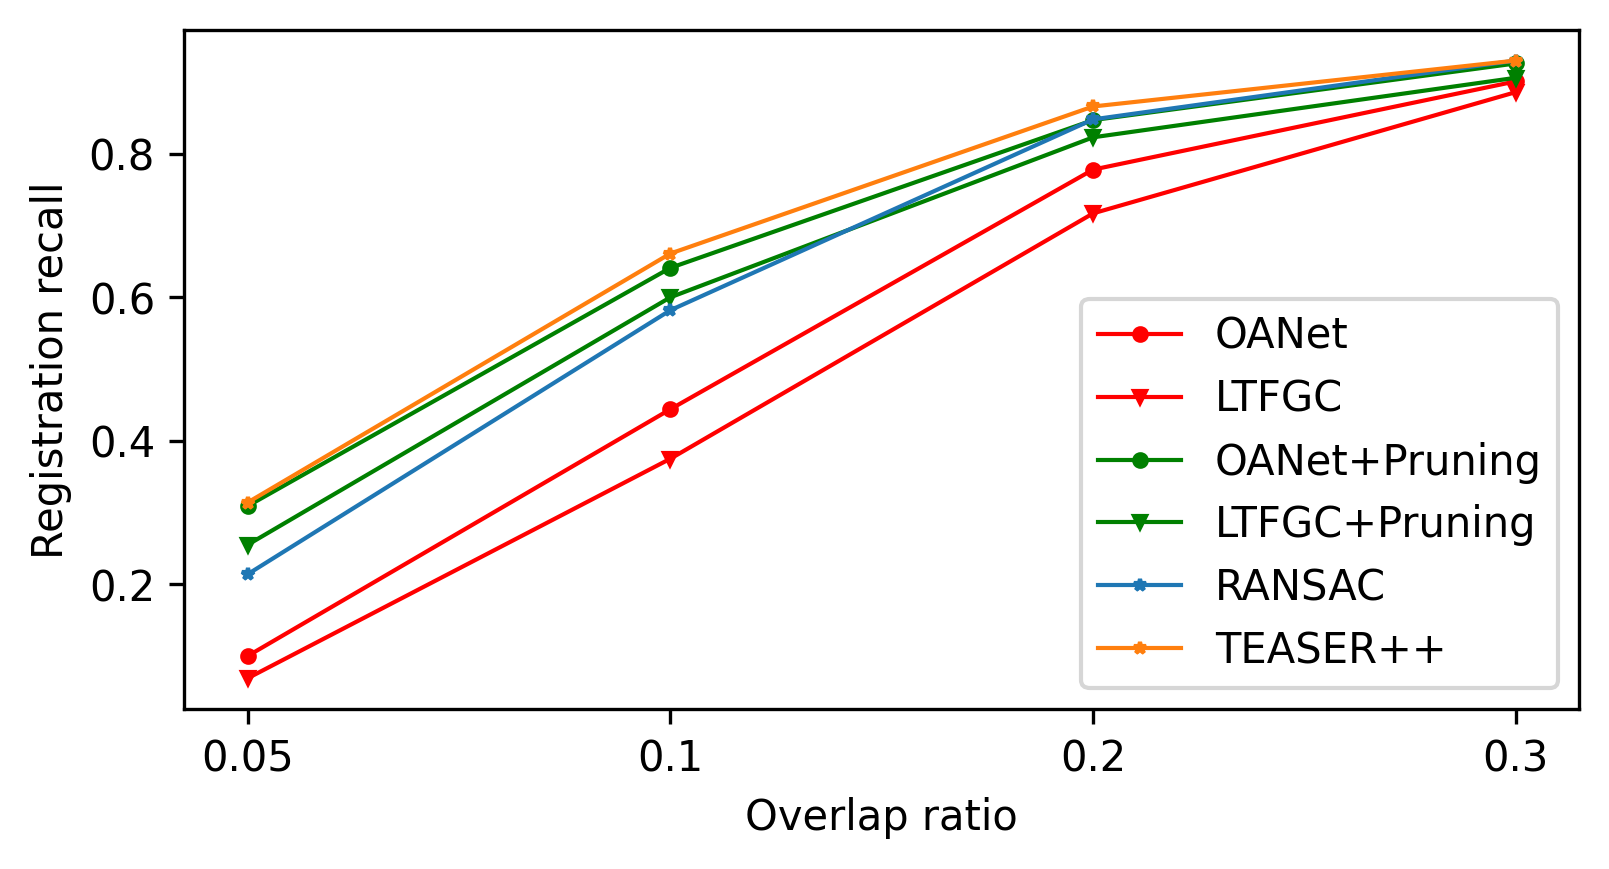

In [6]:
oanet=[0.1,0.444,0.778,0.901]
ltfgc=[0.069,0.375,0.717,0.886]
oanet_prune=[0.309,0.641,0.847,0.926]
ltfgc_prune=[0.255,0.6,0.823,0.906]
teaser=[0.314,0.661,0.866,0.930]
ransac=[0.214,0.582,0.848,0.930]
plt.figure(figsize=(6,3),dpi=300)
plt.plot(oanet,'r-o',label='OANet',linewidth=1, markersize=3)
plt.plot(ltfgc,'r-v',label='LTFGC',linewidth=1, markersize=3)
plt.plot(oanet_prune,'g-o',label='OANet+Pruning',linewidth=1, markersize=3)
plt.plot(ltfgc_prune,'g-v',label='LTFGC+Pruning',linewidth=1, markersize=3)
plt.plot(ransac,'-*',label='RANSAC',linewidth=1, markersize=3)
plt.plot(teaser,'-*',label='TEASER++',linewidth=1, markersize=3)

tickes=[0.05,0.1,0.2,0.3]
plt.xticks(np.arange(len(tickes)),tickes)
plt.xlabel('Overlap ratio',fontsize=10)
plt.ylabel('Registration recall',fontsize=10)
plt.legend()

In [2]:
files=sorted(glob.glob('dump/pre/*.pth'),key=natural_key)
overlap_mat,gt_perm_mat,est_perm_mat,score_mat=[],[],[],[]
for eachfile in files:
    sample=torch.load(eachfile)
    overlap_mat.append(sample['overlap'].cpu())
    gt_perm_mat.append(sample['gt_perm_mat'].cpu())
    est_perm_mat.append(sample['est_perm_mat'].cpu().exp())
    score_mat.append(sample['score'].cpu())
overlap_mat=np.vstack(overlap_mat)
gt_perm_mat=np.vstack(gt_perm_mat)
est_perm_mat=np.vstack(est_perm_mat)
score_mat=np.vstack(score_mat)
print(overlap_mat.shape,gt_perm_mat.shape,est_perm_mat.shape,score_mat.shape)

(234, 10, 10) (234, 11, 11) (234, 11, 11) (234, 10, 10)


In [24]:
import torch.nn.functional as F
from lib.util import mutual_selection
overlap_matrix=torch.from_numpy(overlap_mat)
mutuals=torch.from_numpy(mutual_selection(overlap_matrix))  #[B,N,N]
thresholding = overlap_matrix>=0.5
permutation_matrix = mutuals & thresholding
permutation_matrix = F.pad(permutation_matrix,(0,1,0,1),'constant',0)  #[B,N+1,N+1]

# number of total inliers
n_postive_samples=permutation_matrix.sum([1,2])

# assign outliers 
overlap_matrix=F.pad(overlap_matrix,(0,1,0,1),'constant',-1e7)
flag_row=(permutation_matrix.sum(2)==0.) & (overlap_matrix.max(2)[0]<=0.5)
flag_column=(permutation_matrix.sum(1)==0.) & (overlap_matrix.max(1)[0]<=0.5)
permutation_matrix[:,:,-1]=flag_row.float()
permutation_matrix[:,-1,:]=flag_column.float()
permutation_matrix[:,-1,-1]=0

In [25]:
permutation_matrix.shape

torch.Size([234, 11, 11])

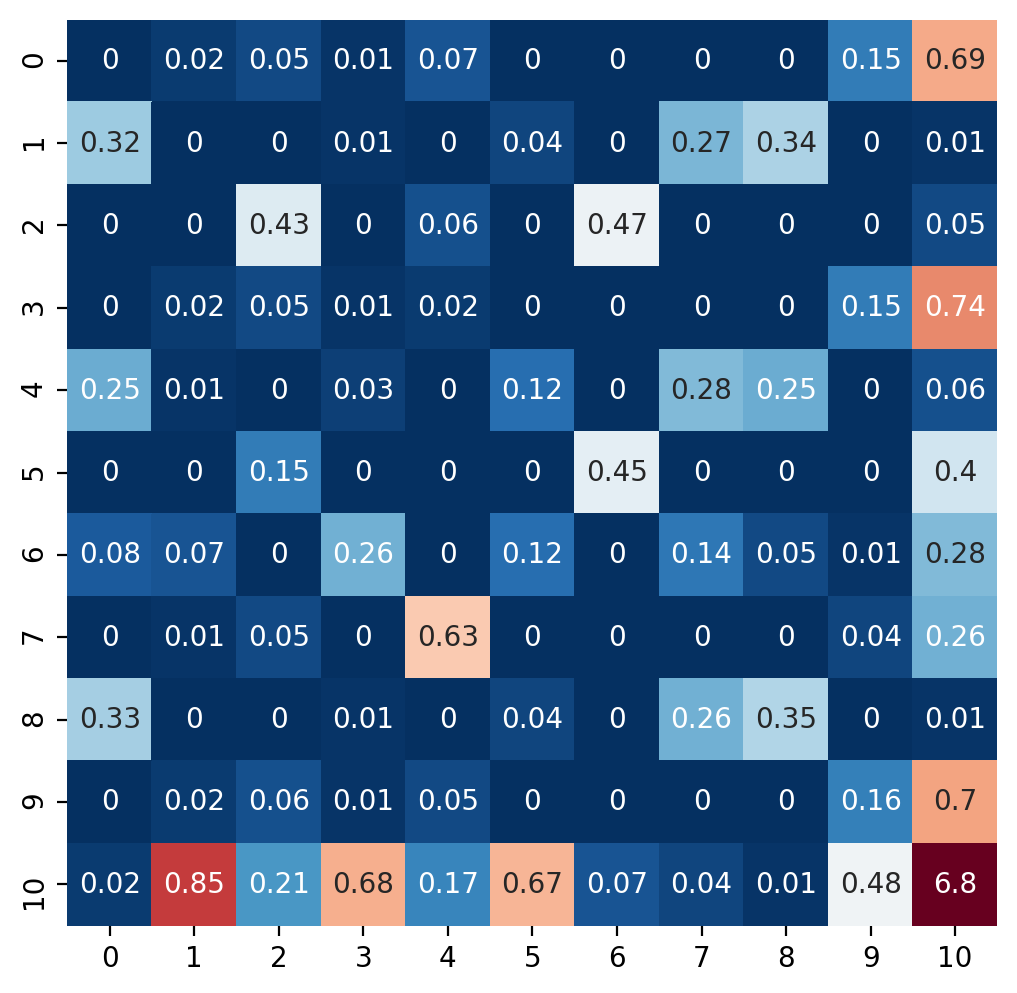

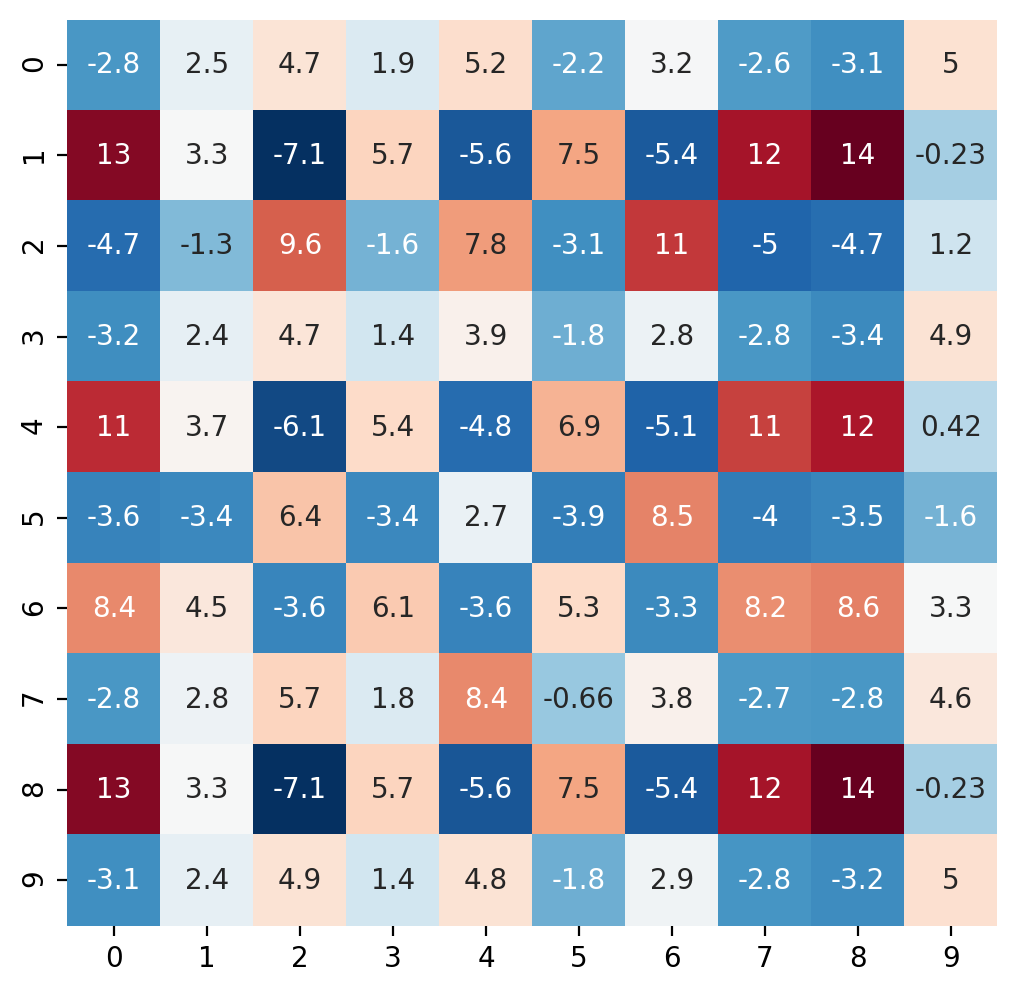

In [26]:
idx=76
plt.figure(figsize=(6,6),dpi=200)
c_mat=np.round(overlap_mat[idx],2)
sns.heatmap(c_mat,vmin=0,vmax=1,cmap='RdBu_r',annot=True,cbar=False)
plt.figure(figsize=(6,6),dpi=200)
c_mat=permutation_matrix[idx].numpy()
sns.heatmap(c_mat,vmin=0,vmax=1,cmap='RdBu_r',annot=True,cbar=False)
plt.figure(figsize=(6,6),dpi=200)
c_mat=np.round(est_perm_mat[idx],2)
sns.heatmap(c_mat,vmin=0,vmax=1,cmap='RdBu_r',annot=True,cbar=False)
plt.figure(figsize=(6,6),dpi=200)
c_mat=np.round(score_mat[idx],2)
sns.heatmap(c_mat,cmap='RdBu_r',annot=True,cbar=False)

In [15]:
idx

76

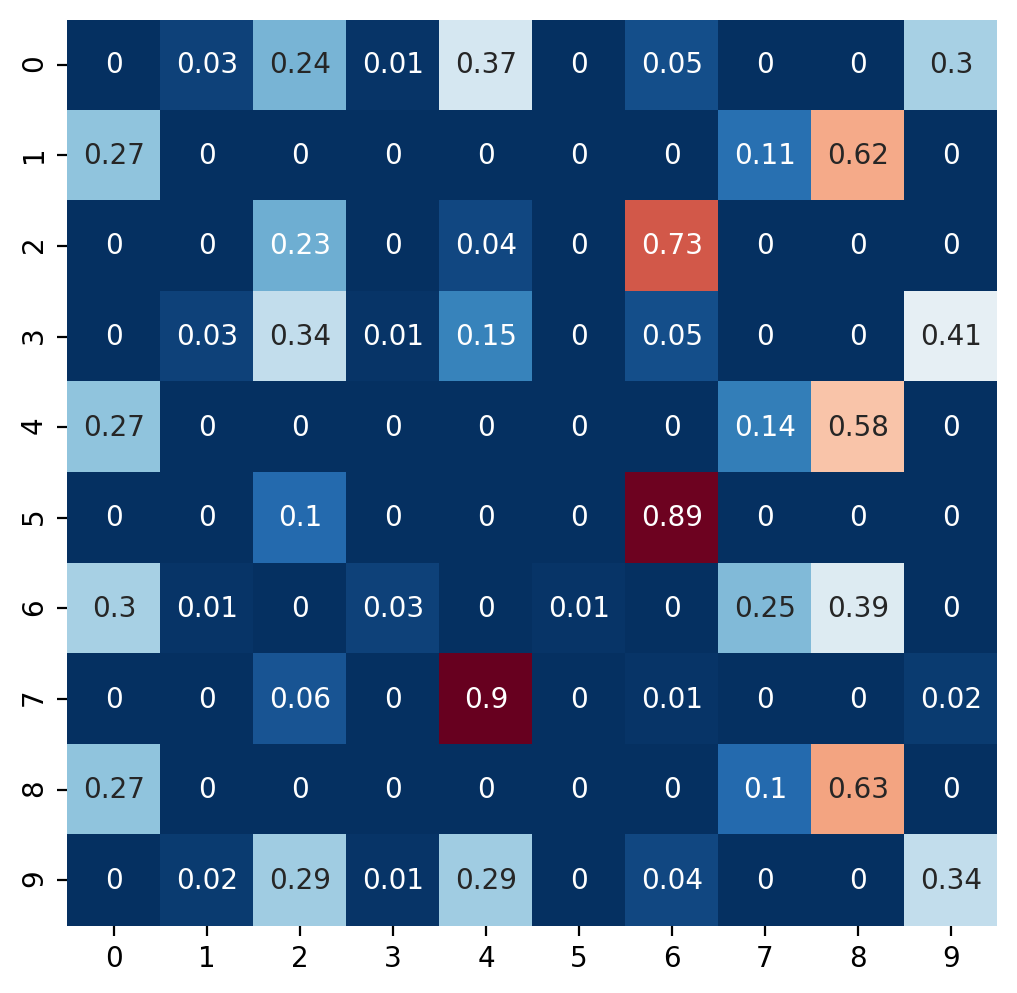

In [22]:
plt.figure(figsize=(6,6),dpi=200)
c_mat=np.round(F.softmax(torch.from_numpy(score_mat[idx]),-1).numpy(),2)
sns.heatmap(c_mat,cmap='RdBu_r',annot=True,cbar=False)

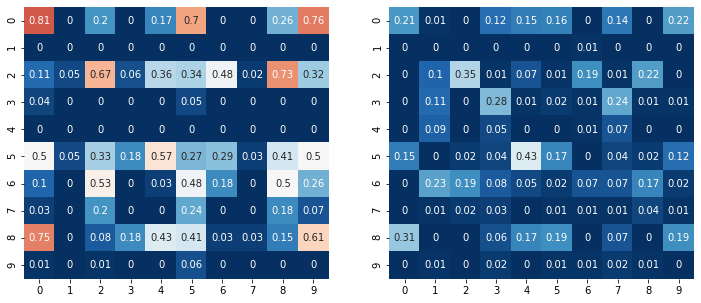

In [25]:
idx=np.random.randint(0,4800,1)[0]
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
c_mat=np.round(inlier_matrices[idx],2)
sns.heatmap(c_mat,vmin=0,vmax=1,cmap='RdBu_r',annot=True,cbar=False)
plt.subplot(1,2,2)
c_mat=np.round(conf_matrices[idx],2)
sns.heatmap(c_mat,vmin=0,vmax=1,cmap='RdBu_r',annot=True,cbar=False)

In [8]:
info=np.load('../../dataset/3DMatch/fcgf_0.025_test_benchmark.npz')
files=sorted(glob.glob('dump/corr_analysis/*.pth'),key=natural_key)

In [9]:
inlier_matrices,conf_matrices,rotation_errors=[],[],[]
for eachfile in files:
    sample=torch.load(eachfile)
    inlier_mat=sample['inlier_mat'].cpu()
    conf_mat=sample['confidence_mat'].cpu()
    rotation_error=sample['rot_errors']
    inlier_matrices.append(inlier_mat)
    conf_matrices.append(conf_mat)
    rotation_errors.append(rotation_error)
inlier_matrices=np.vstack(inlier_matrices)
conf_matrices=np.vstack(conf_matrices)
rotation_errors=np.vstack(rotation_errors)
print(inlier_matrices.shape,conf_matrices.shape,rotation_errors.shape)

(1623, 10, 10) (1623, 10, 10) (1623, 10, 10)


In [21]:
rot_errors=rotation_errors.reshape(1623,100)
min_errors=rot_errors.min(-1)
indice=np.where(min_errors>10)[0].tolist()
len(indice)

29

15

In [23]:
idx=indice[1]
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
c_mat=np.round(inlier_matrices[idx],2)
sns.heatmap(c_mat,vmin=0,vmax=1,cmap='RdBu_r',annot=True,cbar=False)
plt.subplot(1,3,2)
c_mat=np.round(conf_matrices[idx],2)
sns.heatmap(c_mat,vmin=0,vmax=1,cmap='RdBu_r',annot=True,cbar=False)
plt.subplot(1,3,3)
c_mat=np.round(rotation_errors[idx],0)
sns.heatmap(c_mat,cmap='RdBu_r')

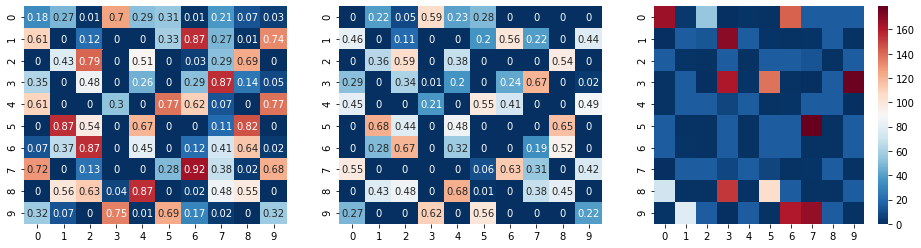

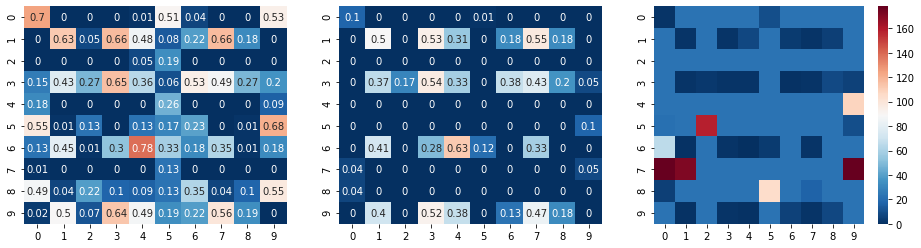

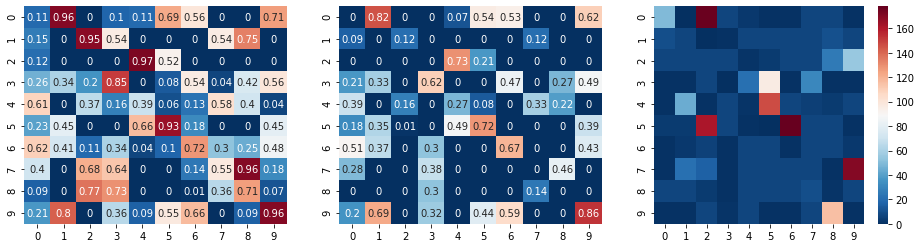

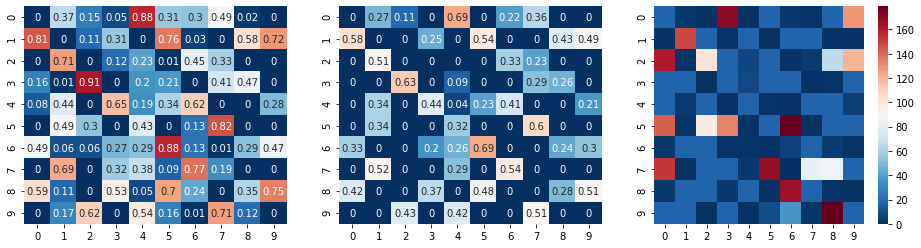

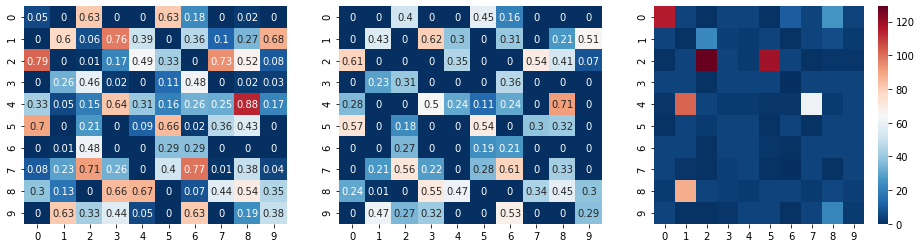

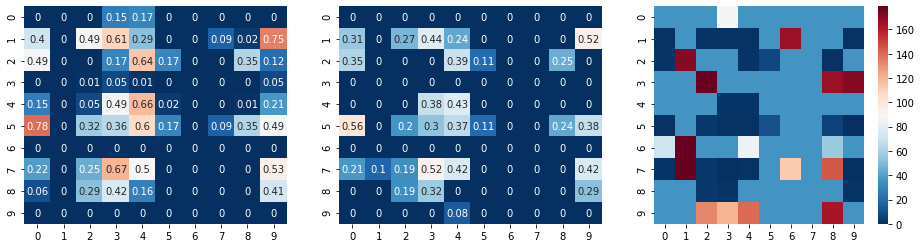

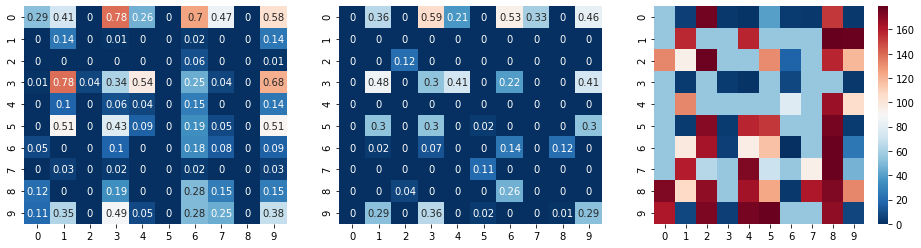

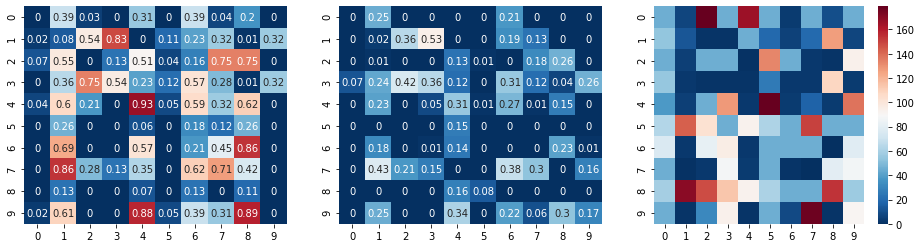

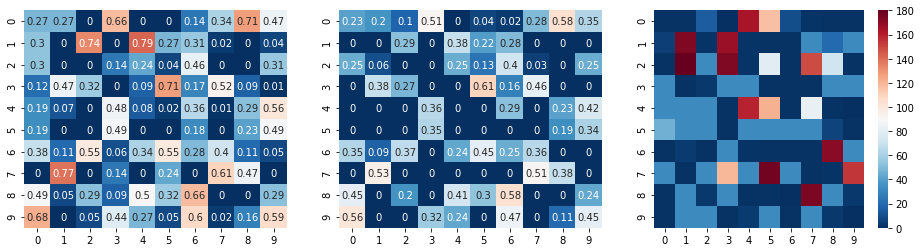

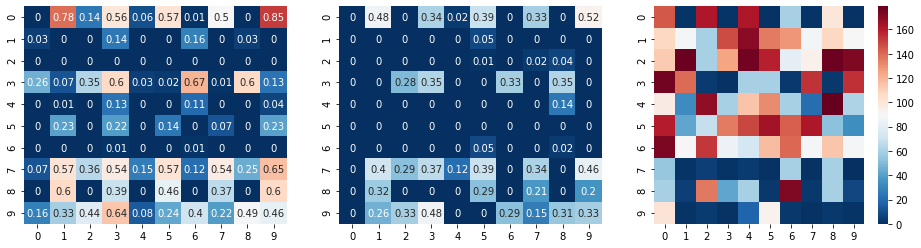

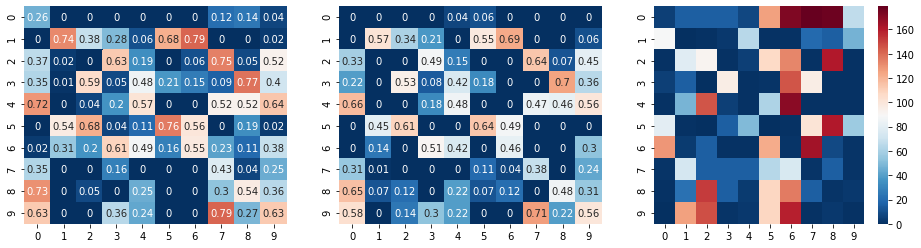

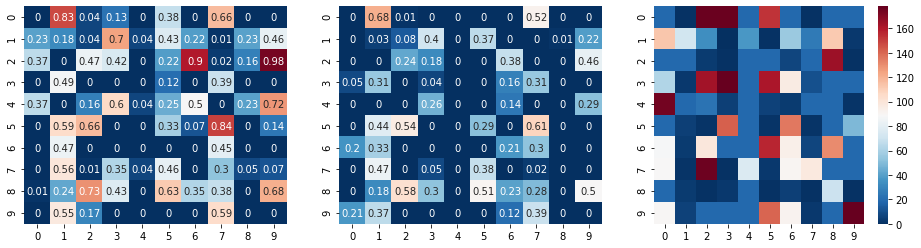

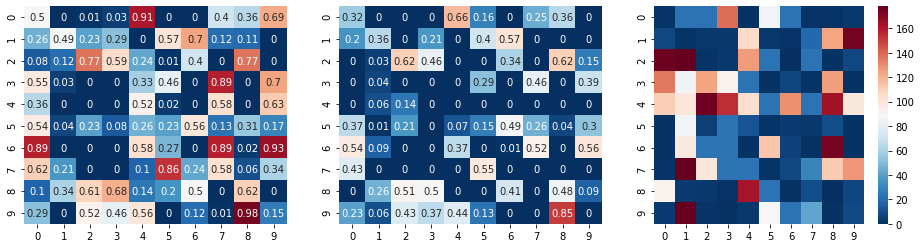

In [19]:
for idx in indice:
    plt.figure(figsize=(16,4))
    plt.subplot(1,3,1)
    c_mat=np.round(inlier_matrices[idx],2)
    sns.heatmap(c_mat,vmin=0,vmax=1,cmap='RdBu_r',annot=True,cbar=False)
    plt.subplot(1,3,2)
    c_mat=np.round(conf_matrices[idx],2)
    sns.heatmap(c_mat,vmin=0,vmax=1,cmap='RdBu_r',annot=True,cbar=False)
    plt.subplot(1,3,3)
    c_mat=np.round(rotation_errors[idx],0)
    sns.heatmap(c_mat,cmap='RdBu_r')

0.18686267405145193
0.1611606452610421
0.1972093023255814
0.1983843329253366


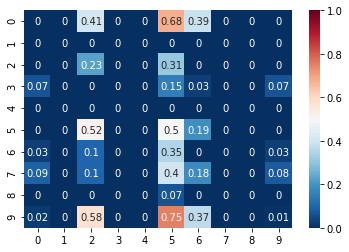

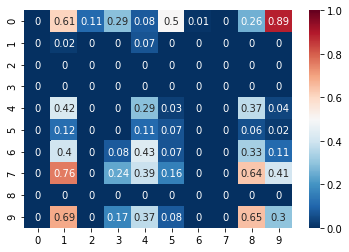

In [4]:
for idx in range(1,100):
    if(info['overlap'][idx]<0.2):
        print(info['overlap'][idx])
        plt.figure()
        c_mat=np.round(inlier_matrices[idx],2)
        sns.heatmap(c_mat,vmin=0,vmax=1,cmap='RdBu_r',annot=True)

In [5]:
import scipy.stats
conf_matrices=conf_matrices.reshape(-1,1)
inlier_matrices=inlier_matrices.reshape(-1,1)
samples=inlier_matrices>0.5
conf_values=conf_matrices[samples]
inlier_values=inlier_matrices[samples]
print(scipy.stats.pearsonr(conf_values,inlier_values))
print(scipy.stats.spearmanr(conf_values,inlier_values))
print(scipy.stats.kendalltau(conf_values,inlier_values))

(0.34766223961973, 0.0)
SpearmanrResult(correlation=0.3527034789184385, pvalue=0.0)
KendalltauResult(correlation=0.25006822427904213, pvalue=0.0)


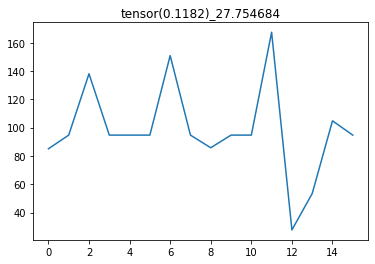

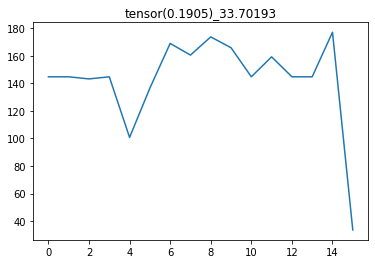

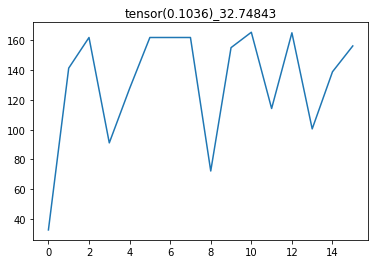

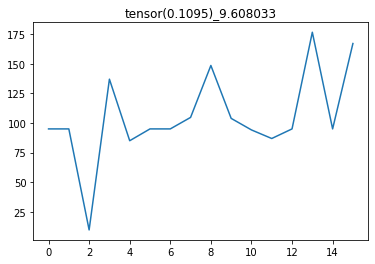

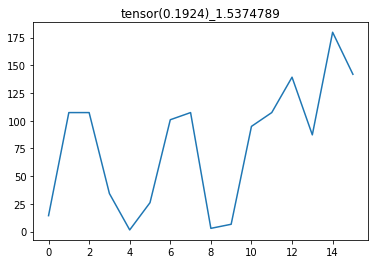

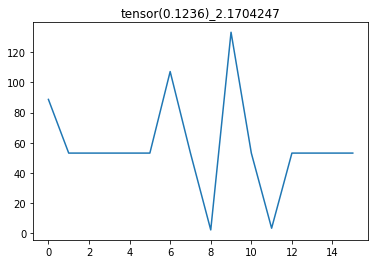

In [29]:
idx=np.random.permutation(90)[0]
sample=torch.load('dump/1_2/%d.pth' % idx)
rot_est=sample['rot_est']
rot_gt=sample['rot_gt']
rot_gt=torch.repeat_interleave(rot_gt,16,0)
rot_errors=get_angle_deviation(rot_est.numpy(),rot_gt.numpy())
rot_errors=rot_errors.reshape(-1,16)
for i in range(8):
    plt.figure()
    plt.plot(rot_errors[i])
    title='%s_%s' % (sample['overlap'][i],np.min(rot_errors[i]))
    plt.title(title)

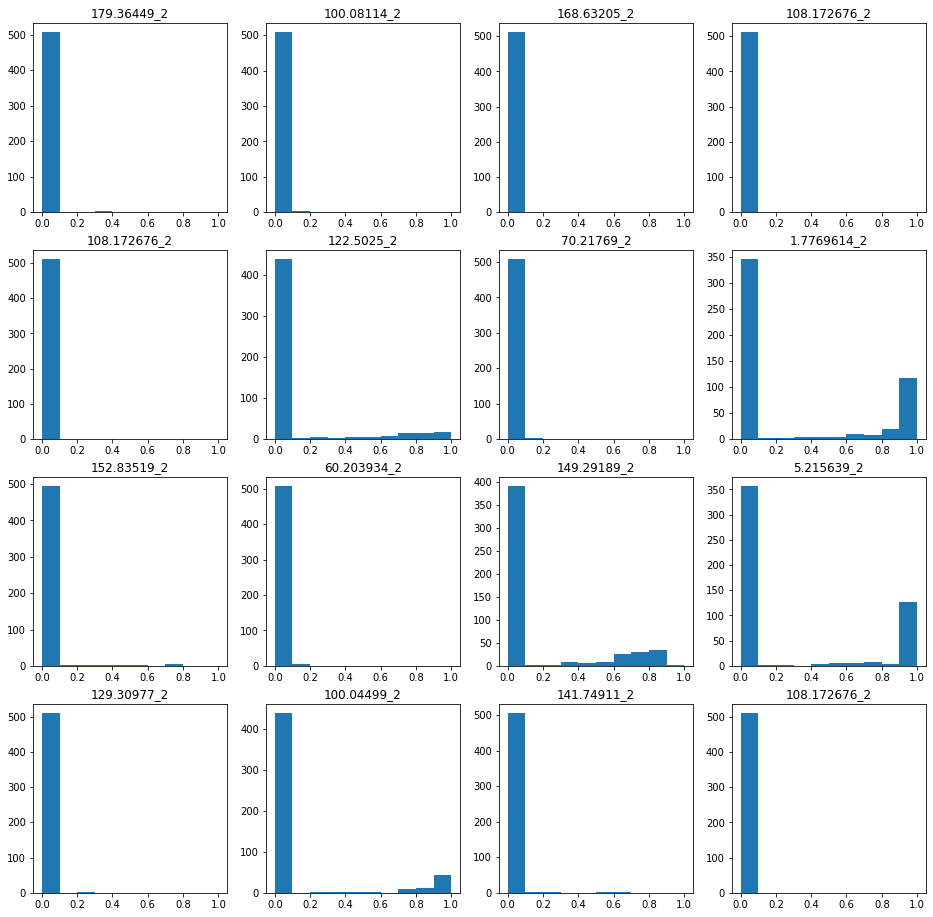

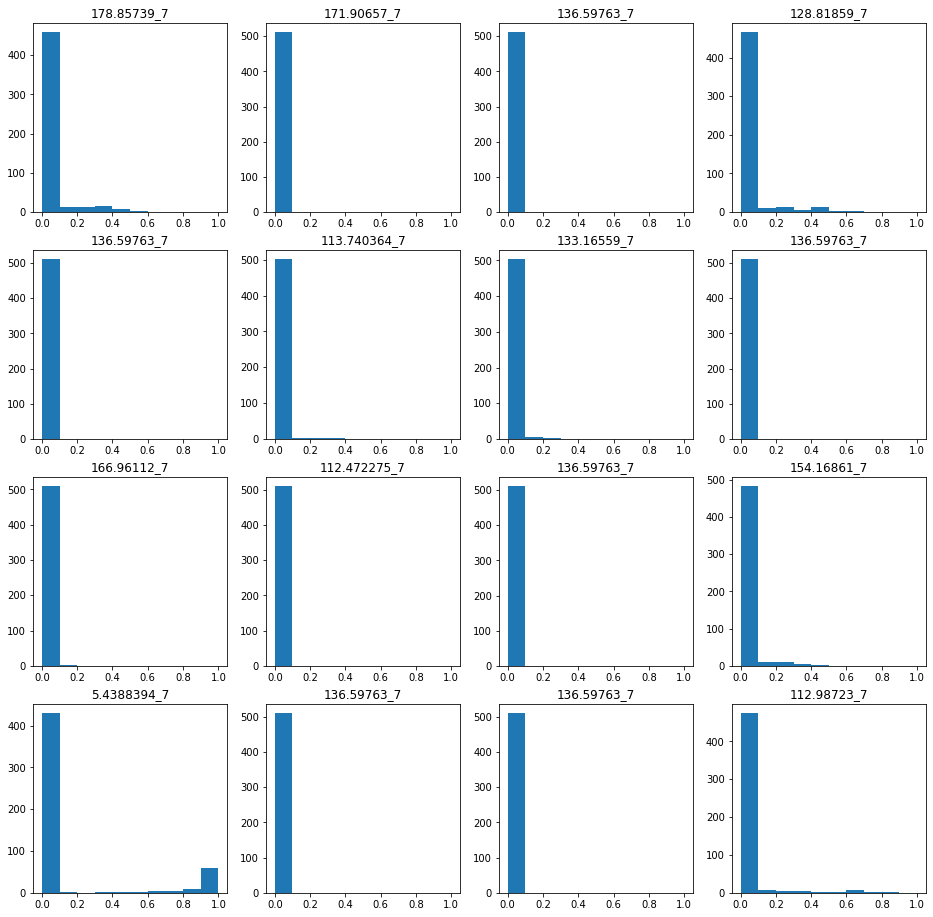

In [9]:
idx=np.random.permutation(90)[0]
sample=torch.load('dump/1_2/%d.pth' % idx)
rot_est=sample['rot_est']
rot_gt=sample['rot_gt']
rot_gt=torch.repeat_interleave(rot_gt,16,0)
rot_errors=get_angle_deviation(rot_est.numpy(),rot_gt.numpy())
rot_errors=rot_errors.reshape(-1,16)
    
logits=sample['logits'].numpy().reshape(-1,16,512)
weights=sample['weights'].numpy().reshape(-1,16,512)

min_errors=rot_errors.min(-1)
for idx in range(8):
    if min_errors[idx]<10:
        c_weights=weights[idx]
        c_rot_errors=rot_errors[idx]

        plt.figure(figsize=(16,16))
        for i in range(16):
            plt.subplot(4,4,i+1)
            plt.hist(c_weights[i],range=(0,1))
            plt.title(str(c_rot_errors[i])+'_'+str(idx))

In [12]:
def ss1(files,N_sparse_points,N_neighbors):
    catch=0
    nn_samples=0
    rotation_errors=[]
    translation_errors=[]
    for eachfile in files:
        # rotation error
        sample=torch.load(eachfile)
        rot_est=sample['rot_est']
        rot_gt=sample['rot_gt']
        rot_gt=torch.repeat_interleave(rot_gt,N_sparse_points**2,0)
        rot_errors=get_angle_deviation(rot_est.numpy(),rot_gt.numpy())
        rot_errors=rot_errors.reshape(-1,N_sparse_points**2)      
        # translation error
        trans_est=sample['trans_est']
        trans_gt=sample['trans_gt']
        trans_gt=torch.repeat_interleave(trans_gt,N_sparse_points**2,0)
        trans_errors=np.linalg.norm((trans_gt-trans_est).squeeze(-1).numpy(),axis=-1)
        trans_errors=trans_errors.reshape(-1,N_sparse_points**2)
        
        # gather decision from the distribution of weights
        weights=sample['weights'].numpy().reshape(-1,N_sparse_points**2,N_neighbors)
        nn_weights=(weights>0.8).sum(-1)
        max_weights=np.argmax(nn_weights,-1)
        
        # info_1
        min_rot_errors=np.argmin(rot_errors,-1)  
        catch+=(max_weights==min_rot_errors).sum()
        nn_samples+=8
        
        # info_2
        error=np.take_along_axis(rot_errors,max_weights[:,None],-1).tolist()
        rotation_errors.extend(error)
        
        error=np.take_along_axis(trans_errors,max_weights[:,None],-1).tolist()
        translation_errors.extend(error)
        
#     print('Catched_samples:',catch/nn_samples)
    
    flag_1=np.array(rotation_errors)<10
    flag_2=np.array(translation_errors)<0.3
    correct=(flag_1 & flag_2).sum()
    
    recall=round(correct/nn_samples,3)
    median_rot_errror=round(np.median(rotation_errors),3)
    
    print('Registration recall:',recall)
    print('Median rotation error:',median_rot_errror)
    
    return recall,median_rot_errror

In [25]:
def ss2(files):
    rotation_errors=[]
    translation_errors=[]
    for eachfile in files:
        sample=torch.load(eachfile)
        rot_est=sample['rot_est'][:8]
        rot_gt=sample['rot_gt']
        rot_errors=get_angle_deviation(rot_est.numpy(),rot_gt.numpy())
        rotation_errors.extend(rot_errors.tolist())
        
        trans_est=sample['trans_est'][:8]
        trans_gt=sample['trans_gt']
        trans_errors=np.linalg.norm((trans_gt-trans_est).squeeze(-1).numpy(),axis=-1)
        translation_errors.extend(trans_errors)
    
    flag_1=np.array(rotation_errors)<10
    flag_2=np.array(translation_errors)<0.3
    correct=(flag_1 & flag_2).sum()
    
    recall=round(correct/flag_1.shape[0],3)
    rot_error=round(np.median(rotation_errors),3)
    
#     print('Registration recall:',correct/flag_1.shape[0])
#     print('Median rotation error:', rot_error)
    
    return recall, rot_error

## 2048 points, 1200 samples, 512 neighborhood size, simple tricky

In [20]:
n_sparse_points=[4,6,8,10,12,14]
recalls,errors=[],[]
for ele in n_sparse_points:
    files=glob.glob('dump/2048_512_%d/*.pth' % ele)
    recall,error=ss1(files,ele,512)
    recalls.append(recall)
    errors.append(error)
plt.figure(figsize=(10,4),dpi=100)
plt.subplot(1,2,1)
plt.plot(recalls)
plt.xticks(np.arange(len(n_sparse_points)),n_sparse_points)
plt.title('Registration recall w.r.t. #clusters')
plt.xlabel('# clusters')
plt.ylabel('recall')
plt.subplot(1,2,2)
plt.plot(errors)
plt.xticks(np.arange(len(n_sparse_points)),n_sparse_points)
plt.title('Median rotation error w.r.t. #clusters')
plt.xlabel('# clusters')
plt.ylabel('median rotation errors')
print(max(recalls),min(errors))
print('registration_recalls:',recalls)
print('median_rotation_errors:',errors)

0.607 5.063
registration_recalls: [0.472, 0.558, 0.594, 0.606, 0.598, 0.607]
median_rotation_errors: [8.689, 6.115, 5.486, 5.224, 5.168, 5.063]


In [22]:
recalls,errors=[],[]
overlaps=np.arange(1,9)/10
for ele in range(1,9):
    files=glob.glob('dump/2048_512_14_%d/*.pth' % ele)
    recall,error=ss1(files,14,512)
    recalls.append(recall)
    errors.append(error)
plt.figure(figsize=(10,4),dpi=100)
plt.subplot(1,2,1)
plt.plot(recalls)
plt.xticks(np.arange(len(overlaps)),overlaps)
plt.title('Registration recall w.r.t. overlaps')
plt.xlabel('overlap ratios')
plt.ylabel('recall')
plt.subplot(1,2,2)
plt.plot(errors)
plt.xticks(np.arange(len(overlaps)),overlaps)
plt.title('Median rotation error w.r.t. overlaps')
plt.xlabel('overlap ratios')
plt.ylabel('median rotation error')
print(max(recalls),min(errors))
print(recalls)
print(errors)

1.0 1.41
[0.607, 0.83, 0.911, 0.957, 0.962, 1.0, 1.0, 1.0]
[5.061, 3.22, 2.583, 2.333, 2.067, 1.663, 1.41, 1.47]


In [5]:
recalls_1=[0.35,0.70,0.86]
recalls_2=[0.54,0.78,0.87]
recalls_3=[0.61,0.83,0.91]
plt.plot(recalls_1,label='ltfgc')
plt.plot(recalls_2,label='top5')
plt.plot(recalls_3,label='exhaustive search')
xticks=[0.1,0.2,0.3]
plt.xticks(np.arange(len(xticks)),xticks)
plt.legend()

## 2048 points, LTFGC

[0.352, 0.699, 0.864]
[47.04, 3.661, 2.422]


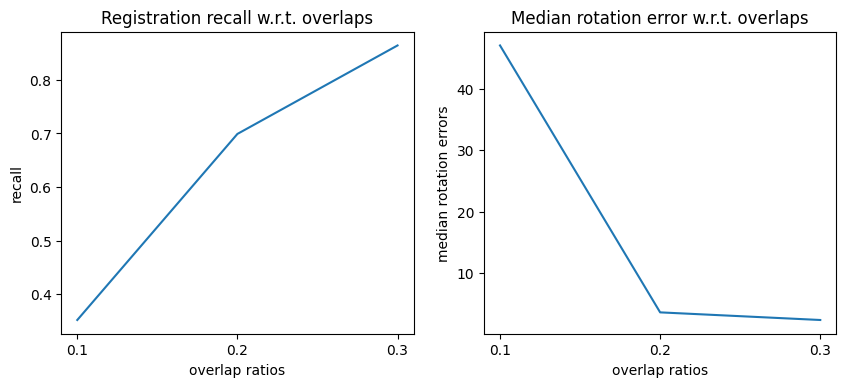

In [24]:
recalls,rot_errors=[],[]
for i in range(1,4):
    files=glob.glob('../devnet/dump/%d_%d/*.pth' % (i,i+1))
    recall,rot_error=ss2(files)
    recalls.append(recall)
    rot_errors.append(rot_error)
overlaps=[0.1,0.2,0.3]
plt.figure(figsize=(10,4),dpi=100)
plt.subplot(1,2,1)
plt.plot(recalls)
plt.xticks(np.arange(len(overlaps)),overlaps)
plt.title('Registration recall w.r.t. overlaps')
plt.xlabel('overlap ratios')
plt.ylabel('recall')
plt.subplot(1,2,2)
plt.plot(rot_errors)
plt.xticks(np.arange(len(overlaps)),overlaps)
plt.title('Median rotation error w.r.t. overlaps')
plt.xlabel('overlap ratios')
plt.ylabel('median rotation errors')
print(recalls)
print(rot_errors)

## benchmark our simple trick

In [16]:
info=np.load('../../dataset/3DMatch/fcgf_0.025_test_benchmark.npz')
N_sparse_points=10
N_neighbors=512

files=sorted(glob.glob('dump/benchmark/*.pth'),key=natural_key)
rotation_est,translation_est=[],[]
for eachfile in files:
    # rotation
    sample=torch.load(eachfile)
    rot_est=sample['rot_est']
    rot_est=rot_est.reshape(-1,N_sparse_points**2,3,3)
    
    # translation
    trans_est=sample['trans_est']
    trans_est=trans_est.reshape(-1,N_sparse_points**2,3,1)

    # gather decision from the distribution of weights
    weights=sample['weights'].numpy().reshape(-1,N_sparse_points**2,N_neighbors)
    nn_weights=(weights>0.8).sum(-1)
    max_weights=np.argmax(nn_weights,-1)[:,None,None,None]

    rot_est=np.take_along_axis(rot_est,max_weights,1)
    trans_est=np.take_along_axis(trans_est,max_weights,1)
    
    rotation_est.append(rot_est)
    translation_est.append(trans_est)
rotation_est=np.vstack(rotation_est)
translation_est=np.vstack(translation_est)
rotation_est=rotation_est.squeeze()
translation_est=translation_est.squeeze()

tsfm_est=[]
for i in range(rotation_est.shape[0]):
    tsfm=np.eye(4)
    tsfm[:3,:3]=rotation_est[i]
    tsfm[:3,3]=translation_est[i]
    tsfm_est.append(tsfm)
tsfm_est=np.array(tsfm_est)

benchmark_dir='../../benchmark/3DMatch/gt_result'
scene_names=sorted(os.listdir(benchmark_dir))
c_stamp=time.strftime("%d_%H:%M:%S",time.localtime())
exp_dir=os.path.join(benchmark_dir.split('/gt_result')[0],c_stamp)
os.makedirs(exp_dir)
pcds,colors=[],[]
count=0
for scene_name in scene_names:
    gt_pairs, gt_traj = read_trajectory(os.path.join(benchmark_dir,scene_name,'gt.log'))
    n_samples=len(gt_pairs)
    
    # write the trajectory
    c_directory=os.path.join(exp_dir,scene_name)
    os.makedirs(c_directory)
    write_trajectory(tsfm_est[count:count+n_samples],gt_pairs,os.path.join(c_directory,'est.log'))
    count+=n_samples
benchmark(exp_dir)

Scene	¦ prec.	¦ rec.	¦ re	¦ te	¦ samples	¦
Kitchen	¦ 0.935	¦ 0.935	¦ 2.318	¦ 0.064	¦ 449¦
Home 1	¦ 0.896	¦ 0.896	¦ 1.864	¦ 0.064	¦ 106¦
Home 2	¦ 0.717	¦ 0.717	¦ 3.365	¦ 0.114	¦ 159¦
Hotel 1	¦ 0.934	¦ 0.934	¦ 2.001	¦ 0.070	¦ 182¦
Hotel 2	¦ 0.846	¦ 0.846	¦ 2.190	¦ 0.073	¦  78¦
Hotel 3	¦ 0.846	¦ 0.846	¦ 2.016	¦ 0.043	¦  26¦
Study	¦ 0.842	¦ 0.842	¦ 2.504	¦ 0.098	¦ 234¦
MIT Lab	¦ 0.644	¦ 0.644	¦ 3.052	¦ 0.136	¦  45¦
Mean precision 0.833 +- 0.096
Mean recall 0.833 +- 0.096


In [2]:
def get_r_t(path):
    f=open(path,'r')
    lines=f.readlines()[1:]
    rows=[]
    for eachline in lines:
        eles=eachline.split('	 ')
        rows.append([float(ele) for ele in eles])
    T=np.array(rows)
    r,t=T[:3,:3],T[:3,3]
    return r,t

In [19]:
base_train='/net/pf-pc27/scratch2/shengyu/3DMatch/train'
train_folders=os.listdir(base_train)
low_thre=0.2
ns=[]
xticks=[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for high_thre in xticks:
    n=0
    rots,trans=[],[]
    srcs,tgts=[],[]
    overlap_ratios=[]
    for eachfolder in train_folders:
        c_path=os.path.join(base_train,eachfolder,'overlap.npy')
        overlaps=np.load(c_path)
        c_path=os.path.join(base_train,eachfolder,'05_FCGF_feats_0.025/*.pth')
        samples=sorted(glob.glob(c_path),key=natural_key)
        c_path=os.path.join(base_train,eachfolder,'04_Info/*.txt')
        infos=sorted(glob.glob(c_path),key=natural_key)
        if len(infos)==len(samples):
            real_overlap=np.where((overlaps>=low_thre) & (overlaps<high_thre))
            indice_0=real_overlap[0]
            indice_1=real_overlap[1]

            for i in range(indice_0.shape[0]):
                ind0,ind1=indice_0[i],indice_1[i]
                if(ind0<ind1): # process each pair
                    n+=1
                    src=samples[ind0].split('/3DMatch/')[1]
                    tgt=samples[ind1].split('/3DMatch/')[1]

                    r0,t0=get_r_t(infos[ind0])
                    r1,t1=get_r_t(infos[ind1])
                    r=r1.T.dot(r0)
                    t=r1.T.dot(np.expand_dims(t0-t1,1))

                    rots.append(r)
                    trans.append(t)
                    srcs.append(src)
                    tgts.append(tgt)
                    overlap_ratios.append(overlaps[ind0,ind1])

        else:
            pass
    ns.append(n)

([<matplotlib.axis.XTick at 0x7fc571456940>,
 [Text(0, 0, '0.2'),
  Text(0, 0, '0.3'),
  Text(0, 0, '0.4'),
  Text(0, 0, '0.5'),
  Text(0, 0, '0.6'),
  Text(0, 0, '0.7'),
  Text(0, 0, '0.8'),
  Text(0, 0, '0.9'),
  Text(0, 0, '1')])

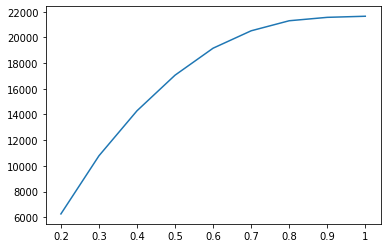

In [18]:
# low_threshold=0.1
plt.plot(ns)
plt.xticks(np.arange(len(xticks)),xticks)

([<matplotlib.axis.XTick at 0x7fc5727542e8>,
 [Text(0, 0, '0.3'),
  Text(0, 0, '0.4'),
  Text(0, 0, '0.5'),
  Text(0, 0, '0.6'),
  Text(0, 0, '0.7'),
  Text(0, 0, '0.8'),
  Text(0, 0, '0.9'),
  Text(0, 0, '1')])

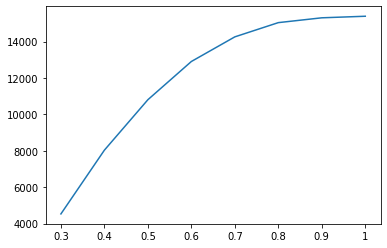

In [20]:
# low_threshold=0.2
plt.plot(ns)
plt.xticks(np.arange(len(xticks)),xticks)